<a href="https://colab.research.google.com/github/yiftachsa/AI-Advanced/blob/main/tfds_coding_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow as tf
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load data

In [ ]:
# ds = tfds.load('stanford_dogs')

# # Build your input pipeline
# ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
# ds.take(10)

In [ ]:
ds, ds_info = tfds.load('diamonds', split='train',  with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/incomplete.CXPS5P_1.0.0/diamonds-train.tfrecord*...:   0%|       …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='diamonds',
    full_name='diamonds/1.0.0',
    description="""
    This classic dataset contains physical attributes and prices of 53940 diamonds.
    
    Attributes:
    
      * price: Price in US dollars.
      * carat: Weight of the diamond.
      * cut: Cut quality (ordered worst to best).
      * color: Color of the diamond (ordered best to worst).
      * clarity: Clarity of the diamond (ordered worst to best).
      * x: Length in mm.
      * y: Width in mm.
      * z: Depth in mm.
      * depth: Total depth percentage: 100 * z / mean(x, y)
      * table: Width of the top of the diamond relative to the widest point.
    """,
    homepage='https://ggplot2.tidyverse.org/reference/diamonds.html',
    data_dir='/root/tensorflow_datasets/diamonds/1.0.0',
    file_format=tfrecord,
    download_size=2.64 MiB,
    dataset_size=13.01 MiB,
    features=FeaturesDict({
        'features': FeaturesDict({
            'carat': float32,
            'clarity': 

In [ ]:
df = tfds.as_dataframe(ds)
df = pd.DataFrame(df)
# df_with_info = tfds.as_dataframe(ds, ds_info)

In [ ]:
df.shape

(53940, 10)

#Preprocess

In [ ]:
features_cols = [col_name.split("features/")[1] for col_name in df.columns.to_list() if "features/" in col_name]
df.rename(columns={col_name: col_name.split("features/")[1] for col_name in df.columns.to_list() if "features/" in col_name}, inplace=True)

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='diamonds',
    full_name='diamonds/1.0.0',
    description="""
    This classic dataset contains physical attributes and prices of 53940 diamonds.
    
    Attributes:
    
      * price: Price in US dollars.
      * carat: Weight of the diamond.
      * cut: Cut quality (ordered worst to best).
      * color: Color of the diamond (ordered best to worst).
      * clarity: Clarity of the diamond (ordered worst to best).
      * x: Length in mm.
      * y: Width in mm.
      * z: Depth in mm.
      * depth: Total depth percentage: 100 * z / mean(x, y)
      * table: Width of the top of the diamond relative to the widest point.
    """,
    homepage='https://ggplot2.tidyverse.org/reference/diamonds.html',
    data_dir='/root/tensorflow_datasets/diamonds/1.0.0',
    file_format=tfrecord,
    download_size=2.64 MiB,
    dataset_size=13.01 MiB,
    features=FeaturesDict({
        'features': FeaturesDict({
            'carat': float32,
            'clarity': 

In [ ]:
df_info = pd.DataFrame({
    "nunique_vals": df.nunique(),
    "dtype": df.dtypes,
    "missing_count": df.apply(lambda x: sum(x.isnull()),axis=0)
})
df_info

,nunique_vals,dtype,missing_count
carat,273,float32,0
clarity,8,int64,0
color,7,int64,0
cut,5,int64,0
depth,184,float32,0
table,127,float32,0
x,554,float32,0
y,552,float32,0
z,375,float32,0
price,11602,float32,0


##Scaling

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df.shape, test_df.shape, df.shape



((43152, 10), (10788, 10), (53940, 10))

In [ ]:
train_df

,carat,clarity,color,cut,depth,table,x,y,z,price
16640,0.73,5,4,4,61.599998,56.000000,5.80,5.82,3.57,3463.0
1579,1.10,3,4,3,62.500000,58.000000,6.59,6.54,4.10,5729.0
15452,0.43,7,3,4,61.299999,55.000000,4.86,4.89,2.99,1683.0
29959,0.61,0,1,1,63.400002,57.099998,5.37,5.43,3.42,1168.0
22335,0.40,2,1,3,60.900002,60.000000,4.75,4.77,2.90,737.0
...,...,...,...,...,...,...,...,...,...,...
20203,1.14,3,3,2,63.200001,56.000000,6.67,6.63,4.20,6435.0
41629,2.25,2,4,3,61.500000,61.000000,8.47,8.41,5.19,17233.0
43353,0.40,2,0,1,63.500000,55.000000,4.67,4.72,2.98,720.0
47188,1.21,2,6,0,65.000000,59.000000,6.64,6.57,4.29,4147.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# X = df.drop("price", axis=1)
# y = df["price"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_df, test_df = train_test_split(df, test_size=0.2)

for feat in features_cols:
  scaler = MinMaxScaler()
  train_df[feat] = scaler.fit_transform(train_df[feat].values.reshape(-1, 1))
  test_df[feat] = scaler.transform(test_df[feat].values.reshape(-1,1))


X_train = train_df[features_cols].to_numpy()
y_train = train_df["price"].to_numpy()

X_test = test_df[features_cols].to_numpy()
y_test = test_df["price"].to_numpy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43152, 9), (43152,), (10788, 9), (10788,))

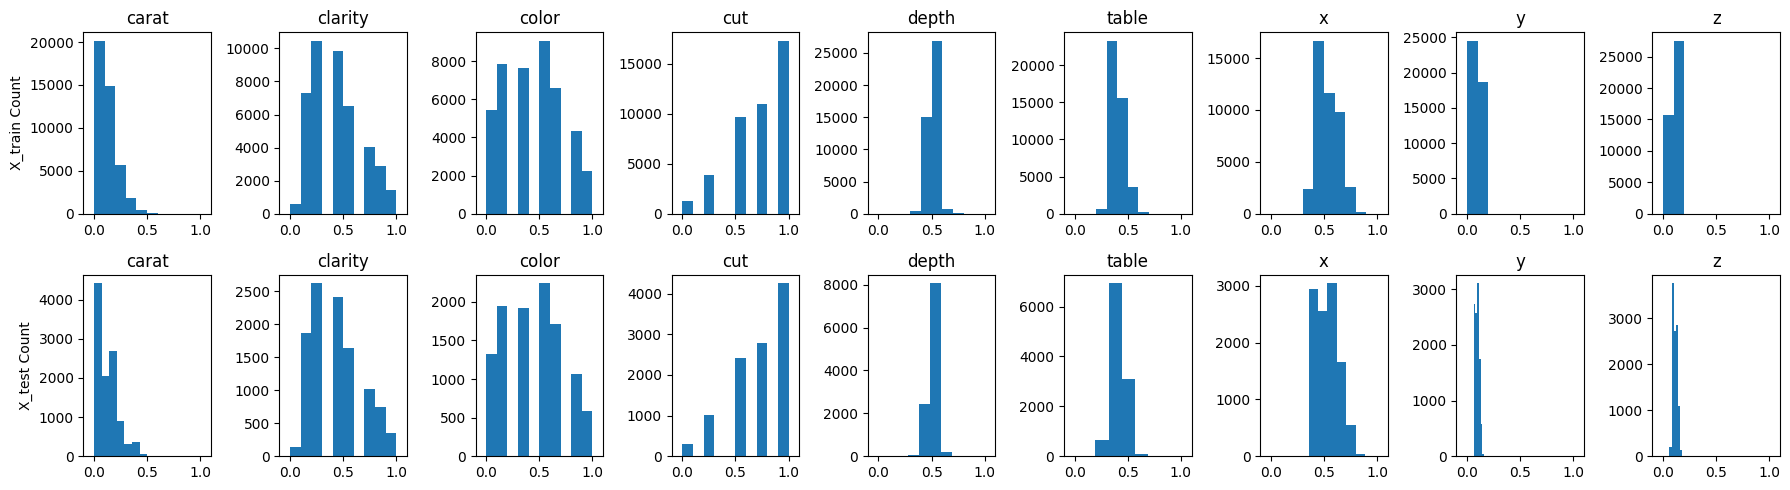

In [ ]:
fig, axes = plt.subplots(2, len(features_cols), figsize=(len(features_cols)*2, 5))

for i, curr_X in enumerate([train_df, test_df]):
  for j, curr_col in enumerate(features_cols):
    axes[i,j].hist(curr_X[curr_col], bins=10)
    axes[i,j].set_xlim(-0.1,1.1)
    axes[i,j].set_title(f"{curr_col}")
    if j==0:
      if i==0:
        axes[i,j].set_ylabel("X_train Count")
      else:
        axes[i,j].set_ylabel("X_test Count")
plt.tight_layout()
plt.show()

###Scaling comparison

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# for feat in features_cols:
#   scaler = MinMaxScaler()
#   df[f"{feat}_min_max_scaled"] = scaler.fit_transform(df[feat].values.reshape(-1, 1))

# for feat in features_cols:
#   scaler = StandardScaler()
#   df[f"{feat}_standard"] = scaler.fit_transform(df[feat].values.reshape(-1, 1))

# for feat in features_cols:
#   scaler = RobustScaler()
#   df[f"{feat}_robust_scaled"] = scaler.fit_transform(df[feat].values.reshape(-1, 1))


In [ ]:
# df.describe()

In [ ]:
# suffixes = ["", "_min_max_scaled", "_standard", "_robust_scaled"]

# fig,axes = plt.subplots(len(suffixes), len(features_cols), figsize=(len(suffixes)*6, len(features_cols)*1))

# for i, suffix in enumerate(suffixes):
#   for j, feat in enumerate(features_cols):
#     # sns.histplot(data=df, x=f"{feat}{suffix}", ax=axes[i,j])
#     axes[i,j].hist(df[f"{feat}{suffix}"])
#     axes[i,j].set_title(f"{feat}{suffix}")
#     axes[i,j].set_xlabel(f"{feat}{suffix}")
#     axes[i,j].set_ylabel("Count")
# plt.tight_layout()
# plt.show()

In [ ]:

# stats = ["mean", "var", "min", "max", "median"]
# summary_dict = {}

# for suffix in suffixes:
#     if suffix == "":
#         suffix_label = "original"
#     else:
#         suffix_label = suffix.replace("_", "")

#     actual_cols = [f"{col}{suffix}" for col in features_cols]

#     records = []
#     columns = []

#     for col in actual_cols:
#         base_col = col if suffix == "" else col.replace(f"{suffix}", "")
#         stats_values = [
#             df[col].mean(),
#             df[col].var(),
#             df[col].min(),
#             df[col].max(),
#             df[col].median(),
#         ]
#         for stat, val in zip(stats, stats_values):
#             columns.append((base_col, stat))
#         records.extend(stats_values)

#     # Create a DataFrame with one row and MultiIndex columns
#     multi_index = pd.MultiIndex.from_tuples(columns, names=["feature", "statistic"])
#     summary_row = pd.DataFrame([records], index=[suffix_label], columns=multi_index)
#     summary_dict[suffix_label] = summary_row

# # Combine all summary rows
# final_df = pd.concat(summary_dict.values(), keys=summary_dict.keys())
# final_df.index.name = "scaling"



#NN Model Definition

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Input, Dropout
from tensorflow.keras.models import Model
# from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from scikeras.wrappers import KerasRegressor

def dense_block(x, units, bn=True, dropout=True, activation="relu"):
  x = Dense(units=units, activation=activation)(x)
  if bn:
    x = BatchNormalization()(x)
  if dropout:
    x = Dropout(rate=0.2)(x)
  return x

def create_model(input_shape):
  input = Input(shape=input_shape)
  x = dense_block(input, input_shape[-1])
  x = dense_block(x, input_shape[-1]//2)
  x = dense_block(x, input_shape[-1]//2)

  x = Dense(1, activation="linear")(x)

  model = Model(inputs=input, outputs=x)
  model.compile(optimizer="adam", loss="mse", metrics=["root_mean_squared_error"])
  return model



In [ ]:
nn_model = create_model(input_shape=(X_train.shape[1],))
nn_model.summary()
# plot_model(model, show_shapes=True)

# xgb_model = XGBRegressor()
# rf_model = RandomForestRegressor()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223 (892.00 B)

 Trainable params: 189 (756.00 B)

 Non-trainable params: 34 (136.00 B)

# Training

In [ ]:
# # Wrap the model for sklearn
# nn_regressor = KerasRegressor(create_model, epochs=50, batch_size=32, verbose=0)

# # CV
# cv = KFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(nn_regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# print("MSE per fold:", -scores)
# print("Average MSE:", -scores.mean())

In [ ]:
X_train.shape

(43152, 9)

In [ ]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = nn_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping])


Epoch 1/60
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 31015464.0000 - root_mean_squared_error: 5568.7871 - val_loss: 31516758.0000 - val_root_mean_squared_error: 5613.9790
Epoch 2/60
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 30947976.0000 - root_mean_squared_error: 5562.6997 - val_loss: 31034758.0000 - val_root_mean_squared_error: 5570.8848
Epoch 3/60
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 30673784.0000 - root_mean_squared_error: 5537.6353 - val_loss: 30322654.0000 - val_root_mean_squared_error: 5506.6011
Epoch 4/60
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 29860672.0000 - root_mean_squared_error: 5464.2651 - val_loss: 29468788.0000 - val_root_mean_squared_error: 5428.5161
Epoch 5/60
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 28839926.0000 - root_mean_squared_error: 5369.8501 - val_loss: 28476656.0000 - val_root_mean_squared_error: 5336.3525
Epoch 6/60
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 27548592.0000 - root_mean_squared_erro

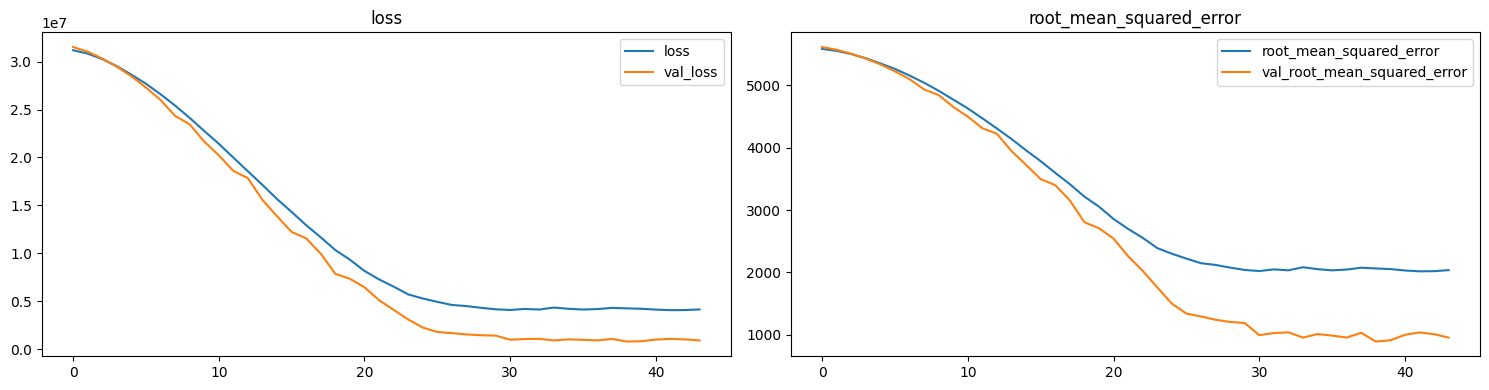

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,2*2))
for j, metric in enumerate(["loss", "root_mean_squared_error"]):
  axes[j].plot(history.history[metric], label=metric)
  axes[j].plot(history.history[f"val_{metric}"], label=f"val_{metric}")
  axes[j].set_title(f"{metric}")
  axes[j].legend()
plt.tight_layout()
plt.show()